In [1]:
# Importar Librerias

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Representacion discreta del intervalo temporal $[-\pi, \pi]$
 ---------------

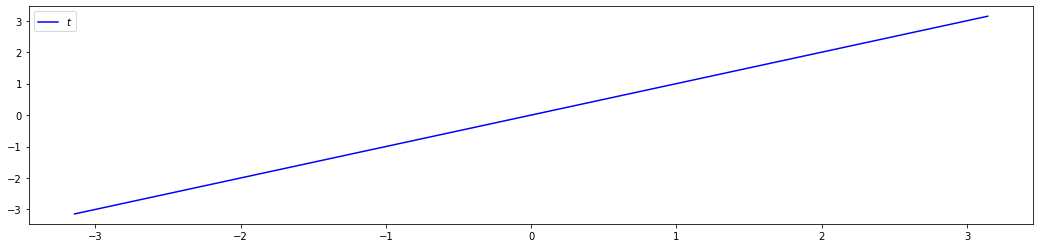

In [2]:
N = 2**10 + 1 # 1025
L = np.pi 
w0 = 2
t = np.linspace(-L, L, N) # Intervalo de tiempo [-Pi, Pi]

w = np.copy(t)   # Intervalo de frecuencias [-Pi, Pi]
omega = np.copy(t) 

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t, t, 'b-',  label='$t$')
ax.legend()


 Ejercicio 1 - Transformada de Fourier y Representacion Frecuencial
 ---------------

1. Usando la escritura de la función seno con exponenciales complejas podemos escribir $x(t) = 2*\sin(\omega_0t) =  \frac{e^{i\omega_0t}-e^{-i\omega_0t}}{i}$, entonces

$$\hat x(\omega) = \frac{2 \pi}{i}  \left( \delta(\omega-\omega_0) - \delta(\omega+\omega_0)   \right)  $$

y luego

$$|\hat x(\omega)| = 2\pi \left( \delta(\omega-\omega_0) + \delta(\omega+\omega_0)  \right) $$

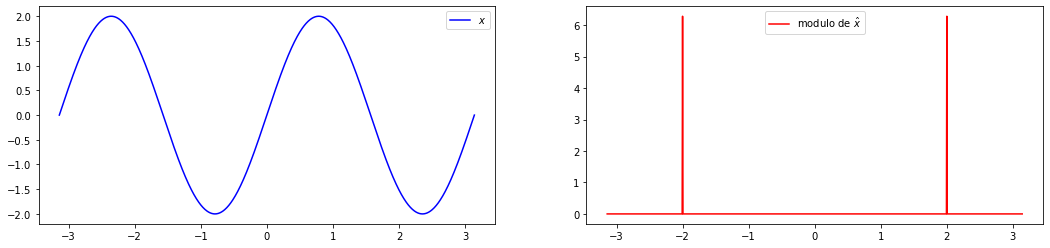

In [3]:
x = 2*np.sin(w0*t)
n_w0 = int((L+w0) * N/(2*L))
minus_n_w0 = int((L-w0) * N/(2*L))
xhatmod = 2*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $\hat{x}$')
ax[0].legend()
ax[1].legend()




2. Al igual que antes, expresamos la señal $x(t)$ utilizando exponenciales $$x(t) = 2\sin(2\omega_0t+2/3) =  \frac{e^{2i\omega_0t}e^{2/3i}-e^{-2i\omega_0t}e^{-2/3i}}{i},$$ entonces

$$\hat x(\omega) = \frac{2 \pi}{i}  \left( \delta(\omega-2\omega_0)e^{2/3i} - \delta(\omega+2\omega_0) e^{-2/3i}  \right)  $$

y luego

$$|\hat x(\omega)| = 2\pi \left( \delta(\omega-2\omega_0) + \delta(\omega+2\omega_0)  \right). $$



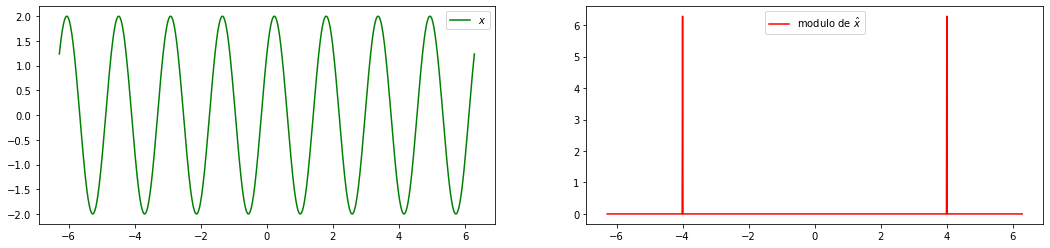

In [4]:
L2 = 2*np.pi 
w0 = 2
t2 = np.linspace(-L2, L2, N) # Intervalo de tiempo [-2*Pi, 2*Pi]

w2 = np.copy(t2)   # Intervalo de frecuencias [-2*Pi, 2*Pi]
omega2 = np.copy(t2) 

x2 = 2*np.sin(2*w0*t2+2/3)
n_w02 = int((L2+2*w0) * N/(2*L2))
minus_n_w02 = int((L2-2*w0) * N/(2*L2))
xhatmod2 = 2*np.pi*(signal.unit_impulse(N, n_w02) + signal.unit_impulse(N, minus_n_w02))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t2, x2, 'g-',  label='$x$')
o2 = ax[1].plot(w2, xhatmod2, 'r-', label='modulo de $\hat{x}$')
ax[0].legend()
ax[1].legend()


3. Usando la expresión como exponencial compleja de las funciones seno y coseno obtenemos  $$x(t) = 2\cos(\omega_0t)+\sin(\omega_0 t) = e^{i\omega_0t}+e^{-i\omega_0t}+\frac{e^{i\omega_0t}-e^{-i\omega_0t}}{2i},$$ entonces

$$\hat x(\omega) = {2 \pi}  \left( \delta(\omega-\omega_0) + \delta(\omega+\omega_0)   \right) + \frac{ \pi}{i}  \left( \delta(\omega-\omega_0) - \delta(\omega+\omega_0)   \right).$$

Luego

$$|\hat x(\omega)| = \pi\sqrt{5} \left( \delta(\omega-\omega_0) + \delta(\omega+\omega_0)  \right). $$

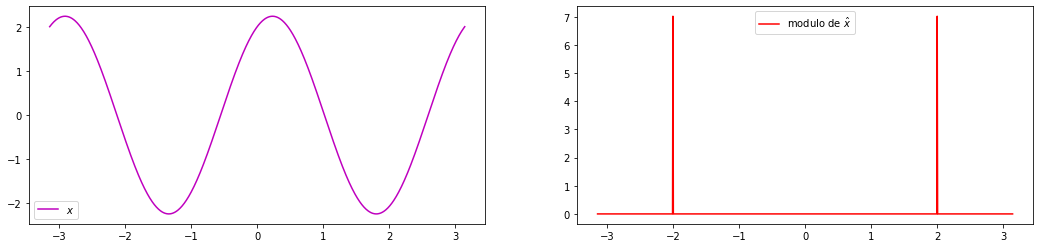

In [5]:
x3 = 2*np.cos(w0*t)+np.sin(w0*t)
n_w0 = int((L+w0) * N/(2*L))
minus_n_w0 = int((L-w0) * N/(2*L))
xhatmod3 = np.sqrt(5)*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x3, 'm-',  label='$x$')
o2 = ax[1].plot(w, xhatmod3, 'r-', label='modulo de $\hat{x}$')
ax[0].legend()
ax[1].legend()

4. Si $x(t)=1=\exp(i \cdot 0\cdot t)$, entonces 
$$\hat x(\omega) = {2 \pi} \delta(\omega).$$
Luego
$$|\hat x(\omega)| = {2 \pi} \delta(\omega). $$

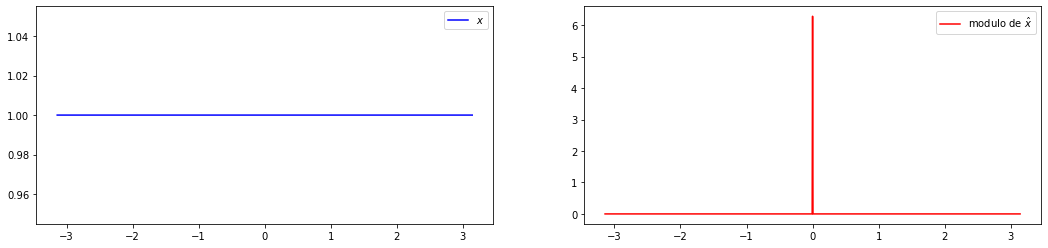

In [6]:
x4 =  [1] * N
n_w0 = int((L) * N/(2*L))
xhatmod4 = 2*np.pi*(signal.unit_impulse(N, n_w0))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x4, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod4, 'r-', label='modulo de $\hat{x}$')
ax[0].legend()
ax[1].legend()

 Ejercicio 2 - Transformada de Fourier y Representacion Frecuencial
 ---------------

1.  Si $x(t) = e^{-at}\gamma(t)$, entonces



\begin{eqnarray}
  \hat x(\omega) &=& \int_0^\infty e^{-at} e^{-i \omega t} dt  \\
                 &=& \int_0^\infty e^{-(a +i \omega) t} dt \\
                 &=& \left[ \frac{e^{-(a +i \omega) t}}{-(a +i \omega)} \right]_0^\infty \\
                 &=&  \frac{1}{(a +i \omega)}
\end{eqnarray}  

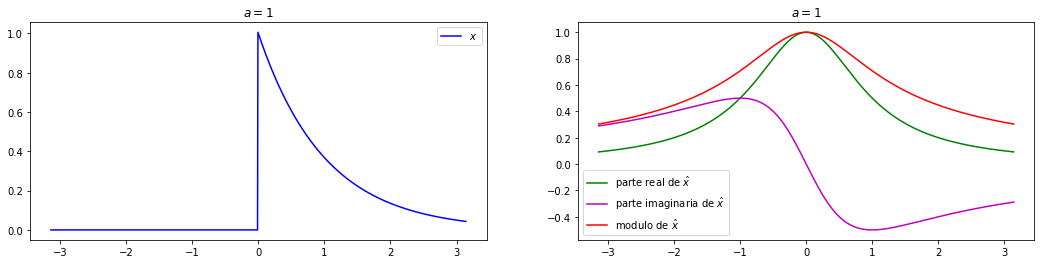

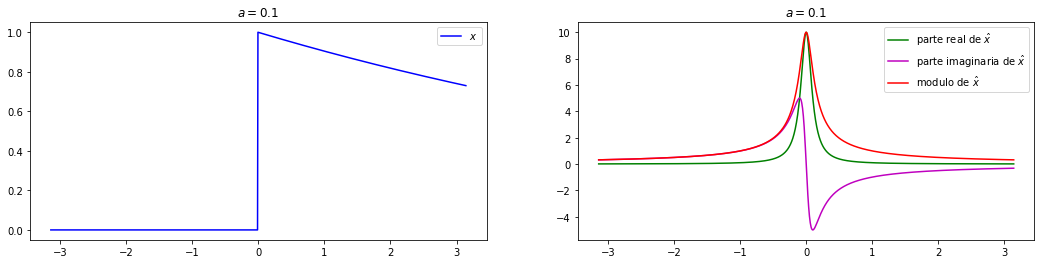

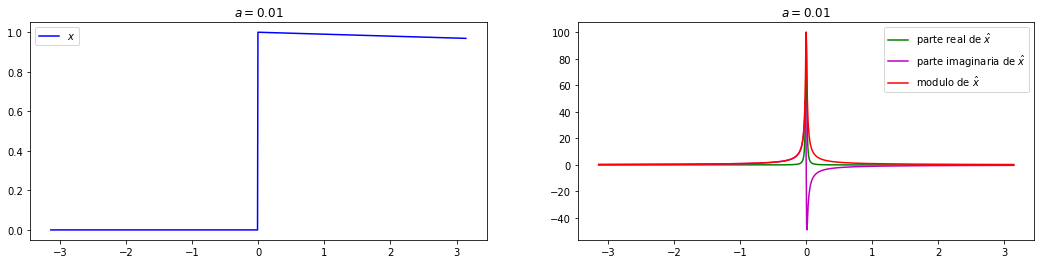

In [7]:
for a in [1, .1, .01]:
    
    x = np.exp(-a*t) 
    x[:int(N/2)-1] = 0
    xhat = 1/(a+1j*omega)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x}$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x}$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

2.  Si $x(t) = e^{-a|t|}$, entonces

\begin{eqnarray}
  \hat x(\omega) &=& \int_{-\infty}^0 e^{at} e^{-i \omega t} dt+\int_{0}^\infty e^{-at} e^{-i \omega t} dt  \\
                 &=&\int_{-\infty}^0  e^{(a-i \omega) t} dt+ \int_0^\infty e^{-(a +i \omega) t} dt \\
                 &=&\left[ \frac{e^{(a -i \omega) t}}{a -i \omega} \right]_{-\infty}^0 + \left[ \frac{e^{-(a +i \omega) t}}{-(a +i \omega)} \right]_0^\infty \\
                 &=& \frac{1}{a -i \omega}+ \frac{1}{a +i \omega}=\frac{2a}{a^2+\omega^2}.
\end{eqnarray} 

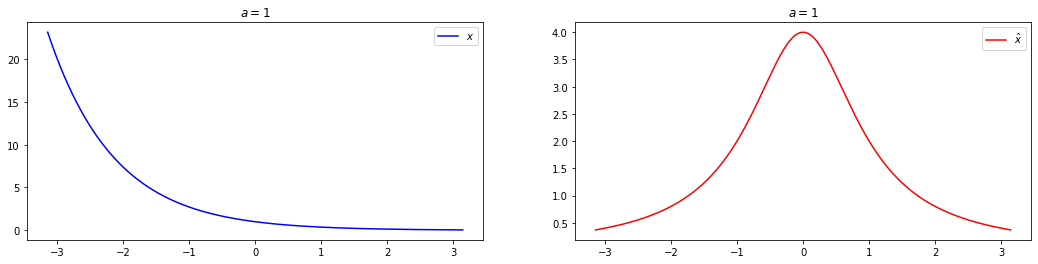

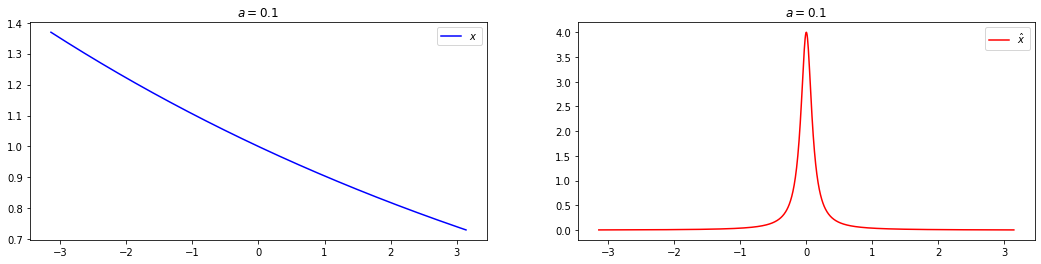

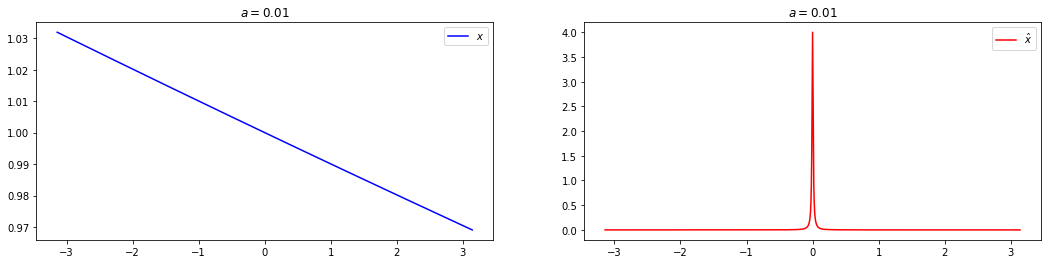

In [8]:
for a in [1, .1, .01]:
    
    x2 = np.exp(-a*t) 
    xhat2 =np.real((1/(a+1j*omega)+1/(a-1j*omega))*2*a)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x2, 'b-', label='$x$')
    o2 = ax[1].plot(w, xhat2, 'r-', label='$\hat{x}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

Se observa que cuando $a$ decrece a cero, la función $x$ se hace casi constante igual a 1, lo cual se refleja en que su tranformada de Fourier $\hat{x}$ se parece a la función $\delta$ de Dirac.

3.  Si $x(t) = \frac{1}{1+t^2}$ entonces usando el resultado anterior con $a=1$ y la fórmula de inversión, obtenemos

\begin{eqnarray}
  \hat x(\omega) &=& \int_{-\infty}^{\infty} \frac{1}{1+t^2} e^{-i \omega t} dt  \\
                 &=& \pi e^{-|\omega|}.
\end{eqnarray} 

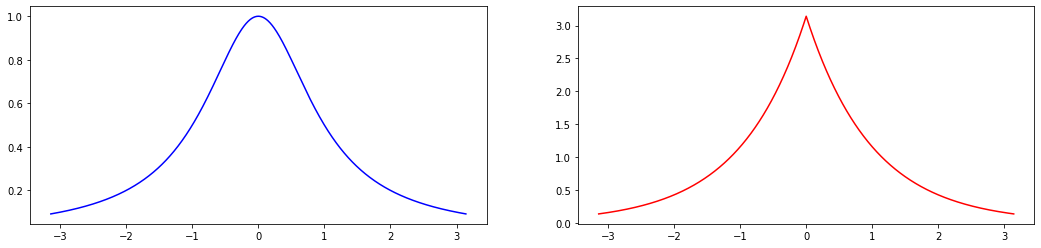

In [9]:
x3 = np.reciprocal(1+np.power(t,2)) 
xhat3 =np.pi*np.exp(-np.abs(omega))

fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x3, 'b-', label='$x$')
o2 = ax[1].plot(w, xhat3, 'r-', label='$\hat{x}$')


4.  Si $x(t) = \frac{1}{2-2t+t^2}=\frac{1}{1+(t-1)^2}$, entonces utilizando la propiedad de traslación y el resultado anterior se tiene

\begin{eqnarray}
  \hat x(\omega) &=& \int_{-\infty}^{\infty} \frac{1}{1+(t-1)^2} e^{-i \omega t} dt  \\
                 &=& \pi e^{-i\omega}e^{-|\omega|}.
\end{eqnarray} 

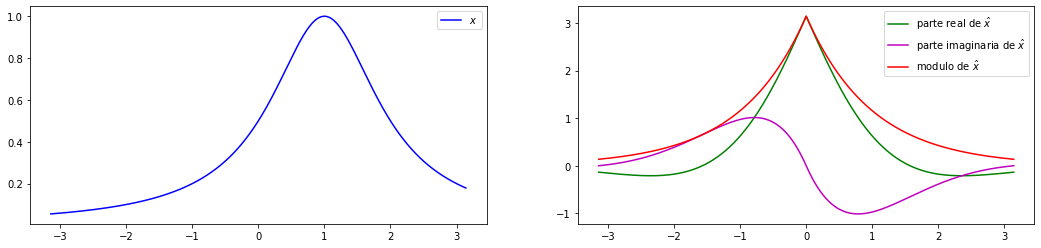

In [10]:
x4 = np.reciprocal(1+np.power(t-1,2)) 
xhat4 =np.pi*np.exp(-np.abs(omega))*np.exp(-1j*omega)

fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x4, 'b-', label='$x$')
o2 = ax[1].plot(w, np.real(xhat4), 'g-', label='parte real de $\hat{x}$')
o2 = ax[1].plot(w, np.imag(xhat4), 'm-', label='parte imaginaria de $\hat{x}$')
o2 = ax[1].plot(w, np.abs(xhat4), 'r-', label='modulo de $\hat{x}$')
ax[0].legend()
ax[1].legend()


5.  Notando que $x(t) = \frac{1}{(1+t^2)^2}=\frac{-1}{2t}\frac{d}{dt} \left(\frac{1}{1+t^2}\right)$ y utilizando la propiedad de derivación de la transformada de Fourier vemos que la transformada de $y(t):=-2t x(t)$ es 
\begin{eqnarray}
  \hat y(\omega) &=&  i \pi \omega\,   e^{-{|\omega|}} .
\end{eqnarray} 

Utilizando ahora la propiedad de multiplicación obtenemos la transformada de Fourier buscada
\begin{eqnarray}
  \hat x(\omega) &=&  \frac{1+|\omega|}{2}\pi e^{-{|\omega|}}.
\end{eqnarray} 



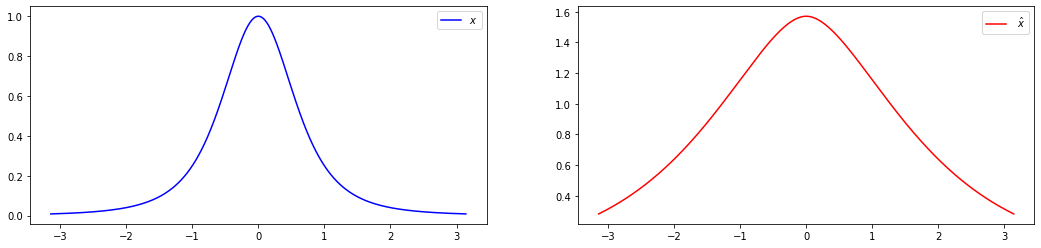

In [11]:
x5 = np.power(np.reciprocal(1+np.power(t,2)),2)
xhat5 =0.5*np.pi*(1+np.abs(omega))*np.exp(-np.abs(omega))

fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x5, 'b-', label='$x$')
o2 = ax[1].plot(w, np.real(xhat5), 'r-', label=' $\hat{x}$')
ax[0].legend()
ax[1].legend()

Ejercicio 3 - Filtro medio
---------------

Definimos la función rectangular por 

\begin{equation}
\label{rect}
    \Pi_T(t) =     \begin{cases}
      \frac 1T & \text{si } |t| < \frac{T}{2}\\
      \frac 1{2T} & \text{si } |t| = \frac{T}{2}  \\
      0 & \text{si no}
    \end{cases} \,.
\end{equation}

El filtro medio, parametrizado por $T>0$, calcula el promedio de la señal en una ventana deslizante de largo $T$. 

1. Su respuesta impulsional es la función rectangular definida por:

$$h(t) = \Pi_T(t - T/2)$$



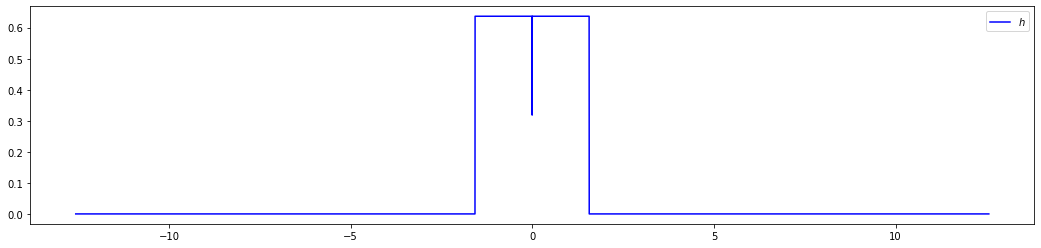

In [34]:
N = 8*2**10 + 1 # 1025
L = 4*np.pi 

t = np.linspace(-L, L, N)
w = t

T = np.pi/2

h = np.zeros_like(t)

n_zero = int(N/2)-1
n_min = n_zero - int(T * N/(2*L))
n_max = n_zero + int(T * N/(2*L))
h[n_min:n_zero] = 1/T
h[n_zero] = 1/(2*T)
h[n_zero+1:n_max] = 1/T

fig, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t, h, 'b-', label='$h$')
ax.legend()


Para encontrar la respuesta impulsional, calculamos la transformada de Fourier de $h$:

\begin{eqnarray}
    \mathcal F (h)(\omega) &=& \frac 1T \int_{-T/2}^{T/2} e^{-i\omega t} dt \\
    &=& \left[ - \frac{e^{-i\omega t}}{i\omega T} \right]_{-T/2}^{T/2} \\
    &=& \frac{e^{i\omega T} - e^{-i\omega T}}{i\omega T}  \\
    &=& \frac{\sin(\omega T)}{\omega T} \\
    &=& \text{sinc}(\omega T)
\end{eqnarray}


In [35]:
sc = np.zeros_like(w)
w_zero = int(N/2)
sc[w_zero] = 1
sc[:w_zero] = 1/T * np.sin(T*w)[:w_zero]/w[:w_zero]
sc[w_zero+1:] = 1/T * np.sin(T*w)[w_zero+1:]/w[w_zero+1:]

Text(0.5, 1.0, 'respuesta impusional filtro medio')

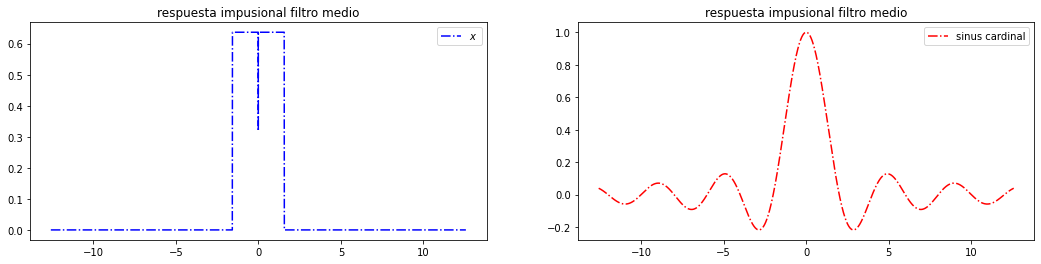

In [36]:
fig, ax = plt.subplots(1, 2,figsize=(18,4))
ax[0].plot(t, h, 'b-.',  label='$x$')
ax[0].legend()
ax[0].set_title('respuesta impusional filtro medio')

ax[1].plot(w, sc, 'r-.',  label='sinus cardinal')
ax[1].legend()
ax[1].set_title('respuesta impusional filtro medio')

Como la respuesta  impulsional $h$  vale cero en el semieje negativo, vemos que el filtro $h$  es causal.

2. a) Si la entrada es $x(t)=1$, entonces la salida será 
$${y}(t)=\int_{-\infty}^{\infty} h(s)\, ds=1.   $$

 b) Si la entrada es $x(t)=\gamma(t)$, entonces la salida será 
$${y}(t)=\int_{-\infty}^{t} h(s)\, ds= \begin{cases} 
      0 & t\leq 0 \\
      \frac{t}{T} & 0\leq x\leq T \\
      1 & T\leq t 
   \end{cases}
 $$
 c) Si la entrada es $x(t)=\cos(\omega_0 t)$, entonces la salida será 
$${y}(t)=\int_{-\infty}^{\infty} \cos(\omega_0 (t-s)) h(s)\, ds=\frac{1}{T}\int_{0}^{T} \cos(\omega_0 (t-s)) \, ds =\frac{\sin(\omega_0 t)+\sin(\omega_0 (T-t))}{\omega_0 T}.
 $$




3. Escribimos $y(t)=\frac{\sin(\omega_0 t)+\sin(\omega_0 (T-t))}{\omega_0 T}$ en la forma $A(\omega_0)\cos(\omega_0 t +\phi(\omega_0))$  utilizando las fórmulas $\cos(a+b)=\cos(a)\cos(b)-\sin(a)\sin(b)$  y $\sin(a+b)=\sin(a)\cos(b)+\sin(b)\cos(a)$. De esta manera 

\begin{eqnarray}
 y(t)=  \frac{1}{\omega_0 T} \left( \sin(\omega_0 t)+\sin(\omega_0 (T-t)) \right)&=& \frac{1}{\omega_0 T}  \left( (1-\cos(\omega_0 T)) \sin(\omega_0 t)+\sin(\omega_0 T)\cos(\omega_0 t) \right)\\
    &=&  -\frac{1}{\omega_0 T}(\cos(\omega_0 T)-1) \sin(\omega_0 t)+\frac{1}{\omega_0 T}\cos(\omega_0 T-\pi/2)\cos(\omega_0 t)\\
    &=&   A(\omega_0)\cos(\omega_0 t +\phi(\omega_0)),
\end{eqnarray}
donde $$\phi(\omega_0)=\arctan\left(\frac{\cos(\omega_0 T)-1}{\cos(\omega_0 T-\pi/2)}\right)=\arctan\left(\frac{\cos(\omega_0 T)-1}{\sin(\omega_0 T)}\right)$$ 
y 
$$A(\omega_0)=\frac{1}{\omega_0 T}\sqrt{2-2\cos(\omega_0 T)}=\frac{2}{\omega_0 T}\sin(\omega_0 T/2)=\text{sinc}(\omega_0 T/2).$$

4. Gráficos 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


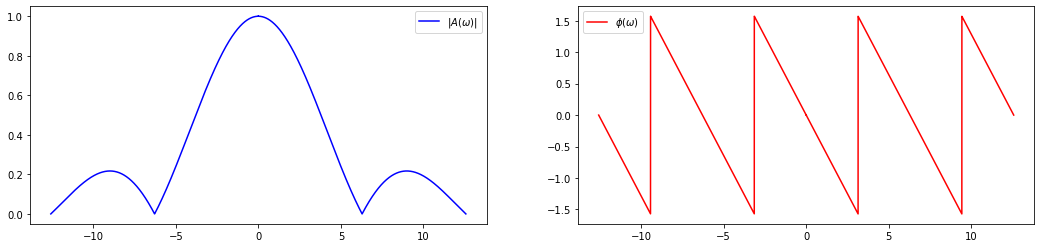

In [37]:
xphase = np.arctan((np.cos(w)-1)*np.reciprocal(np.sin(w)))
xmod=np.sqrt(2-2*np.cos(w))*np.reciprocal(np.abs(w))

fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(w, xmod, 'b-', label='$|A(\omega)|$')
o2 = ax[1].plot(w, xphase, 'r-', label='$\phi(\omega)$')
ax[0].legend()
ax[1].legend()

5. La función de transferencia del sistema es \begin{eqnarray}
    H(\omega) &=& \frac 1T \int_{0}^{T} e^{-i\omega t} dt \\
    &=& \left[ - \frac{e^{-i\omega t}}{i\omega T} \right]_{0}^{T} \\
    &=& \frac{1 - e^{-i\omega T}}{i\omega T}  \\
    &=& \frac{1-\cos(\omega T)+i\sin(\omega T)}{i\omega T}.
\end{eqnarray}

Notar que $|H(\omega)|=\frac{\sqrt{2-2\cos(\omega T)}}{\omega T}=A(\omega).$ Además 
$$\text{arg}(H(\omega))=\arctan\left( \frac{\cos(\omega T)-1}{\sin(\omega T)}\right)= \phi(\omega).$$ En otras palabras, el filtro multiplica en frecuencia por la función $H(\omega)=A(\omega)e^{i\phi(\omega)}.$

Ejercicio 4 - Diagrama de Bode
---------------

Un diagrama de Bode es una representación gráfica que sirve para caracterizar la función de transferencia $H$ de un sistema. Escribiendo la función de transferencia compleja como

$$ H(w) = |H(w)|e^{i\arg(H(w))} $$

el diagrama consta de dos gráficas separadas  de ordenadas en escala logarítmica de $w$ expresada en radianes por segundo (rad/s) y de ordenadas:

* Magnitud (o ganancia) en decibeles (dB)
$$G (w) = 20 \log_{10} (|H(w)|)$$

* Fase en grados
$$\Phi(w) = \arg(H(w)) = \tan^{-1} \left( \frac{Im(H(w))}{Re(H(w))} \right)$$


1. Si dos filtros se conectan en serie, entonces al aplicar una entrada $x(t)$, la salida está dada por $y(t)=((x*h_2)*h_1)(t)$. Aplicando la transformada de Fourier y usando el hecho que la transformada de Fourier de una convolución de funciones es igual al producto de las transformadas de Fourier, se concluye que
$$\hat{y}(\omega)=\hat{x}(\omega)\hat{h_2}(\omega) \hat{h_1}(\omega)=\hat{x}(\omega)H(\omega),$$
donde $H(\omega)=\hat{h_1}(\omega) \hat{h_2}(\omega)=H_1(\omega) H_2(\omega).$

Usando las propiedades de $\log_{10}$ y de $\text{arg}$ se obtiene
$$
\begin{aligned}
&G(\omega)=G_{1}(\omega)+G_{2}(\omega) \\
&\Phi(\omega)=\Phi_{1}(\omega)+\Phi_{2}(\omega)
\end{aligned}
$$




2. Si $
H(\omega)=H_{1}(\omega) / H_{2}(\omega)
$ 
entonces $H_1(\omega)=H(\omega) H_2(\omega)$. Aplicando lo anterior vemos que 
$$
\begin{aligned}
&G_1(\omega)=G(\omega)+G_{2}(\omega) \\
&\Phi_1(\omega)=\Phi(\omega)+\Phi_{2}(\omega).
\end{aligned}
$$
Luego
$$
\begin{aligned}
&G(\omega)=G_{1}(\omega)-G_{2}(\omega) \\
&\Phi(\omega)=\Phi_{1}(\omega)-\Phi_{2}(\omega).
\end{aligned}
$$
Esto resulta particularmente útil para sistemas en los cuales se busca invertir un filtro, es decir, deshacer la distorsión que un filtro (o un medio de transmisión) aplica sobre una señal. 




Ejercicio 4. b)
---------------
### Sistema eléctrico de primer orden
4. b) 1)
Aplicando la transformada de Fourier a la ecuación $x(t)=R C y^{\prime}(t)+y(t)$ se obtiene

$$X(\omega)=i RC \omega Y(\omega)+Y(\omega). $$


Usando las propriedades de la Transformada de Fourier, la respuesta frecuencial es:

$$H(\omega)=\frac{Y(\omega)}{X(\omega)}=\frac{1}{1+i RC \omega}$$

que la rescribimos

$$H(\omega) = \frac{1}{1+i\frac{\omega}{\omega_0}}$$

donde $\omega_0 = 1 / RC$ es la llamada **frecuencia de corte**.

4. b. 2)

Tomando $\omega_0=1$ y usando las funciones *TransferFunction* y *bode* del modulo *signal* del paquete *scipy*, podemos realizar el diagrama de Bode  del sistema $H(\omega)=\frac{1}{1+i  \omega}.$ 

Text(0.5, 0, 'Frecuencia (rad/sec)')

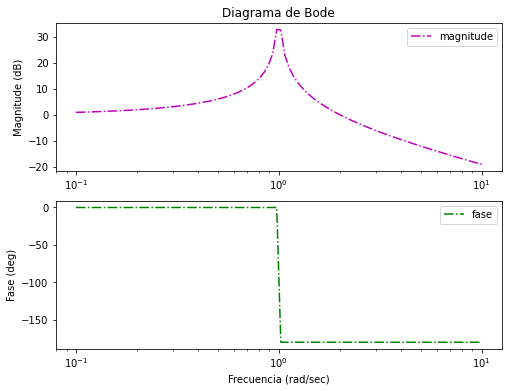

In [23]:
sys = signal.TransferFunction([1], [1j, 1])
w, mag, phase = signal.bode(sys)

fig, ax = plt.subplots(2, 1,figsize=(8,6))
ax[0].semilogx(w, mag, 'm-.',  label='magnitude')
ax[1].semilogx(w, phase, 'g-.',  label='fase')
ax[0].set_title('Diagrama de Bode')
ax[0].legend()
ax[0].set_ylabel('Magnitude (dB)')
ax[1].legend()
ax[1].set_ylabel('Fase (deg)')
ax[1].set_xlabel('Frecuencia (rad/sec)')

Se observa que corresponde a un filtro low-pass. 

4. b) 3) Aplicando la transformada de Fourier a la ecuación 
$\frac{d^{2} y(t)}{d t^{2}}+2 z w_{n} \frac{d y(t)}{d t}+w_{n}^{2} y(t)=k w_{n}^{2} x(t)$
obtenemos
$$H(\omega)=\frac{Y(\omega)}{X(\omega)}=\frac{k\omega_n^2}{-\omega^2 +2i z \omega_n \omega +\omega_n^2}. $$

4. b) 4) Tomando $\omega_n=1=k$ y $z=0.5, 1, 1.5$ obtenemos los siguientes diagramas de Bode

Text(0.5, 0, 'Frecuencia (rad/sec)')

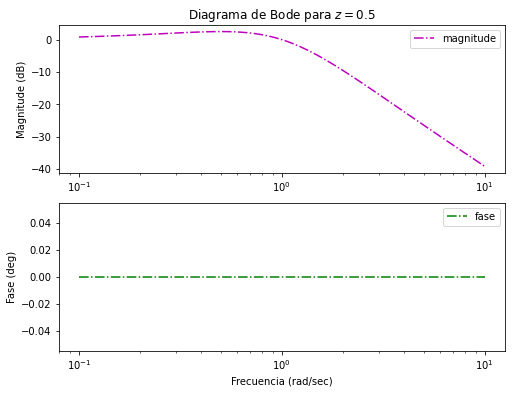

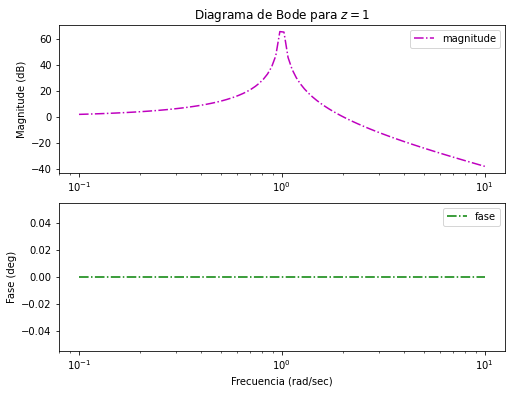

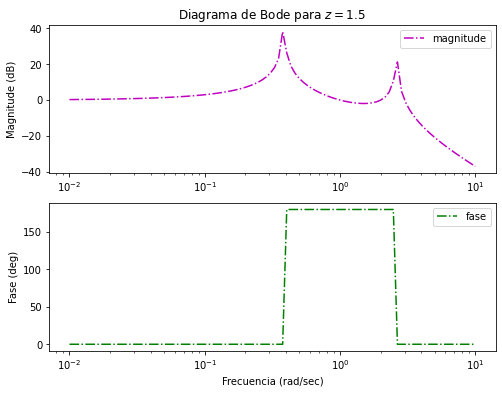

In [25]:
sys05 = signal.TransferFunction([ 1], [-1, 1j,1])
w05, mag05, phase05 = signal.bode(sys05)

fig05, ax05 = plt.subplots(2, 1,figsize=(8,6))
ax05[0].semilogx(w05, mag05, 'm-.',  label='magnitude')
ax05[1].semilogx(w05, phase05, 'g-.',  label='fase')
ax05[0].set_title('Diagrama de Bode para $z=0.5$')
ax05[0].legend()
ax05[0].set_ylabel('Magnitude (dB)')
ax05[1].legend()
ax05[1].set_ylabel('Fase (deg)')
ax05[1].set_xlabel('Frecuencia (rad/sec)')

sys1 = signal.TransferFunction([ 1], [-1, 2*1j,1])
w1, mag1, phase1 = signal.bode(sys1)

fig1, ax1 = plt.subplots(2, 1,figsize=(8,6))
ax1[0].semilogx(w1, mag1, 'm-.',  label='magnitude')
ax1[1].semilogx(w1, phase1, 'g-.',  label='fase')
ax1[0].set_title('Diagrama de Bode para $z=1$')
ax1[0].legend()
ax1[0].set_ylabel('Magnitude (dB)')
ax1[1].legend()
ax1[1].set_ylabel('Fase (deg)')
ax1[1].set_xlabel('Frecuencia (rad/sec)')

sys15 = signal.TransferFunction([ 1], [-1, 3*1j,1])
w15, mag15, phase15 = signal.bode(sys15)

fig15, ax15 = plt.subplots(2, 1,figsize=(8,6))
ax15[0].semilogx(w15, mag15, 'm-.',  label='magnitude')
ax15[1].semilogx(w15, phase15, 'g-.',  label='fase')
ax15[0].set_title('Diagrama de Bode para $z=1.5$')
ax15[0].legend()
ax15[0].set_ylabel('Magnitude (dB)')
ax15[1].legend()
ax15[1].set_ylabel('Fase (deg)')
ax15[1].set_xlabel('Frecuencia (rad/sec)')




Se concluye que el sistema es low-pass.

### Ejercicio 5. Diseño de Filtros.

De la expresion de $H(\omega)$ con $n=1$ obtenemos que


$$|H(\omega)| = \frac{1}{\sqrt{1+ \frac{\omega^2}{\omega_c^2}}}$$

y luego

$$G(\omega) =  20 \log_{10} (|H(w)|) = -10 \log_{10}\left( 1+\frac{\omega^2}{\omega_c^2} \right).$$

Observamos que 

$$ \lim_{\omega \to 0} G(\omega) = 0$$

y que

$$ \lim_{\omega \to \infty} G(\omega) = -10 \log_{10} \left( \frac{\omega^2}{\omega_c^2} \right)  = -20 \log_{10} \left(\omega \right) + 20 \log_{10} \left(\omega_c \right)$$


Ademas, cuando $\omega=\omega_0$, se tiene 

$$G(\omega) = -10 \log_{10} (2) = -3 \text{dB}$$

lo que se interpreta que el filtro atenua el espectro de una señal de $-3 \text{dB}$ en la frecuencia de corte.

Text(0, 0.5, 'Magnitude (dB)')

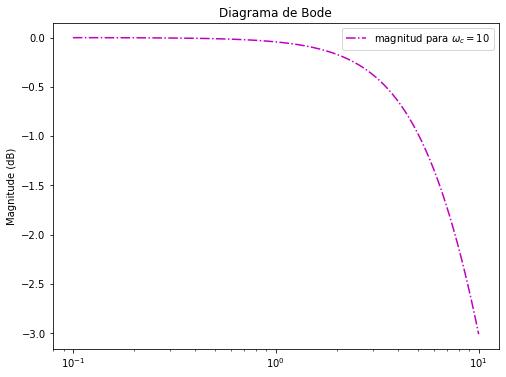

In [30]:
wc = 10
fig, ax = plt.subplots(1, 1,figsize=(8,6))
G = np.copy(w)
G = -10 * np.log10(1+w**2/wc**2)
ax.semilogx(w, G, 'm-.',  label=f'magnitud para $\omega_c = {wc}$')
ax.set_title('Diagrama de Bode')
ax.legend()
ax.set_ylabel('Magnitude (dB)')


Buscamos el menor valor de $n$ de manera que el diagrama de Bode anterior satisfaga los requerimientos de la Figura 4.



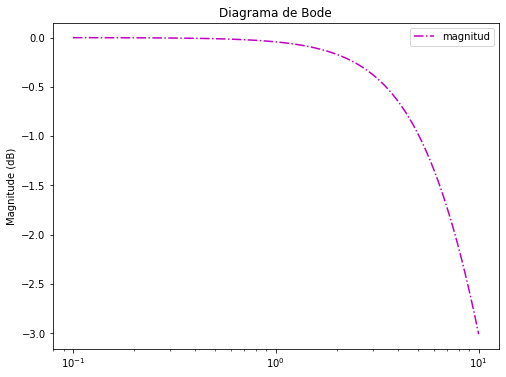

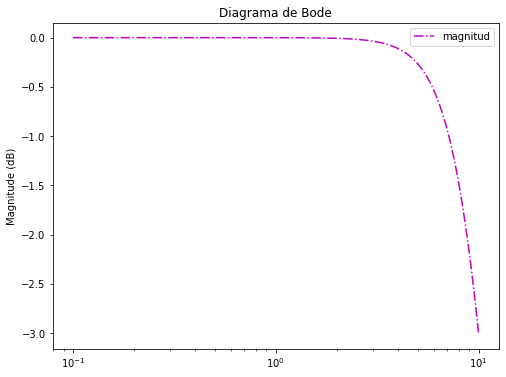

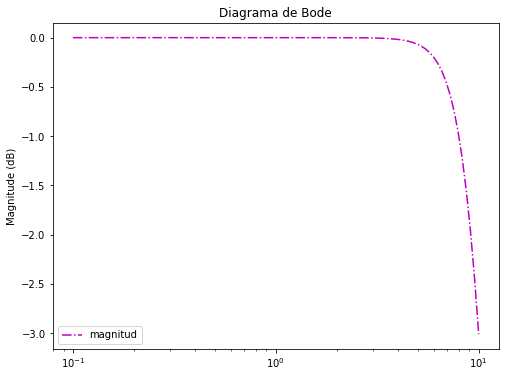

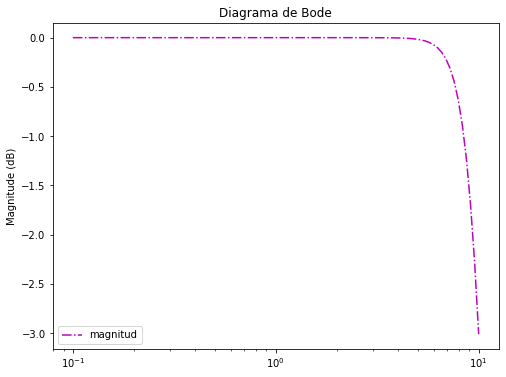

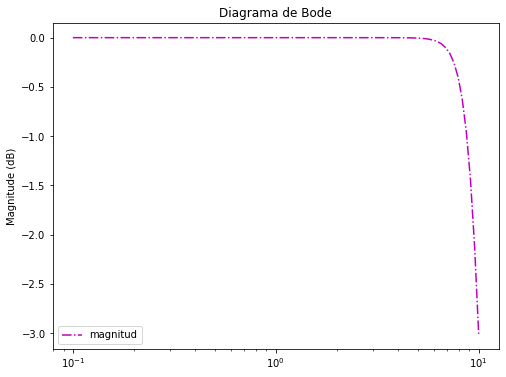

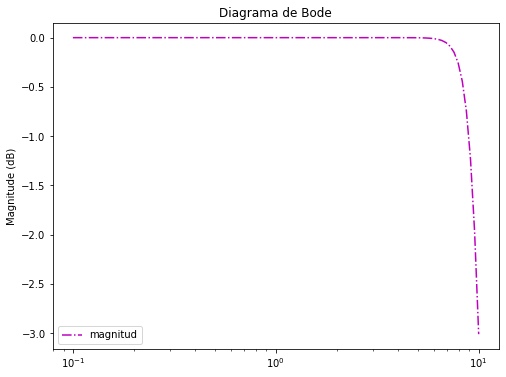

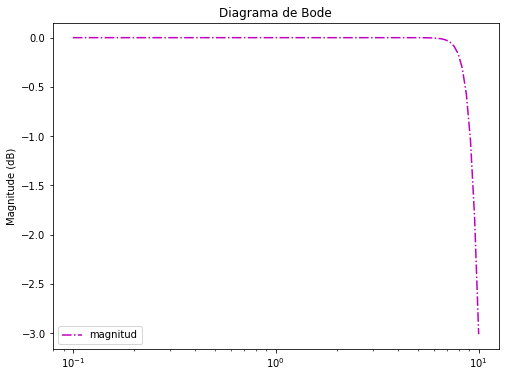

In [33]:
for n in [1, 2, 3, 4, 5, 6 ,7]:

  wc = 10
  fig, ax = plt.subplots(1, 1,figsize=(8,6))
  G = np.copy(w)
  G = -10 * np.log10(1+w**(2*n)/wc**(2*n))
  ax.semilogx(w, G, 'm-.',  label=f'magnitud')
  ax.set_title('Diagrama de Bode')
  ax.legend()
  ax.set_ylabel('Magnitude (dB)')

Vemos que el filtro se parece a un filtro low-pass ideal cuando $n$ crece. 

EL diagrama de la Figura 4 impone restricciones sobre el filtro.

Sea $x:=\frac{\omega}{\omega_c}$. Entonces deben cumplirse las siguientes dos condiciones: 


*  $$ x^{2n} \leq 10^{3/10}-1\approx 1,\qquad\forall x\leq 1.$$
*  $$ x^{2n} \geq 10^{-a/10}-1,\qquad\forall x\geq \frac{\omega_a}{\omega_c} \geq  1.$$
La primera condición se verifica para cualquier $n\geq 1$ y la segunda condición se satisface si
$$n\geq \frac{\log_{10}(10^{-a/10}-1)}{2\log_{10}\omega_a-2\log_{10}\omega_c}. $$


